## Titanic prediction is used to predict the survival rate of those aboard
### there are 12 columns of which cabin column is empty

##### Data Cleaning


In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import time


In [2]:
st = time.time()
#loading the data from csv
titanic_data = pd.read_csv('tested.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_data.shape

(418, 12)

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


##### Dropping irrelevant columns that can introduce noise into the analysis

In [5]:
data = titanic_data.drop(columns=['Name', 'PassengerId','Cabin', 'Ticket'], axis=1)
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

##### Replacing the null values in column 'Age' but before then you need to visualize the data to determine the best value to use

C:\Users\Masterkim\AppData\Local\Temp\ipykernel_6184\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

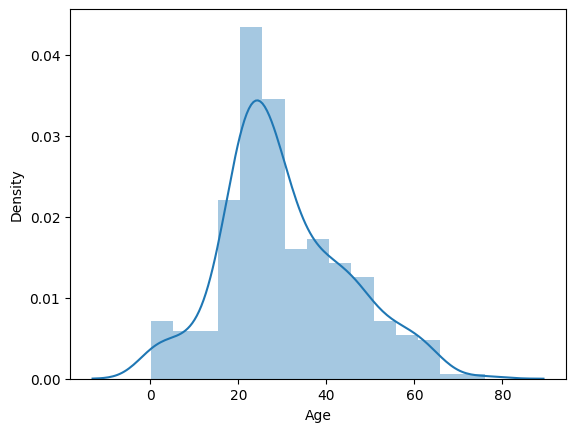

In [6]:
sns.distplot(data['Age'])

<Axes: >

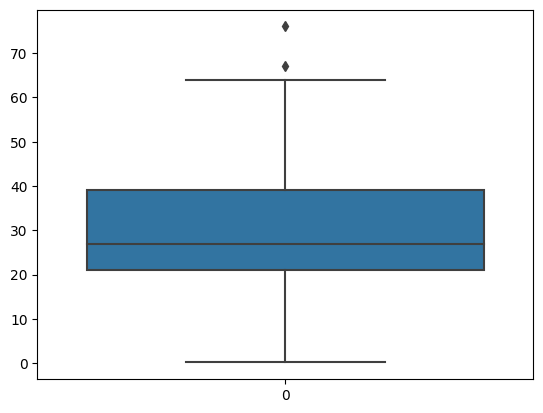

In [7]:
sns.boxplot(data['Age'])

#####  as we can see, there are limited outliers so we are going to use the mean to replace the null values

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

#####  Replacing the null value under "FARE

<Axes: >

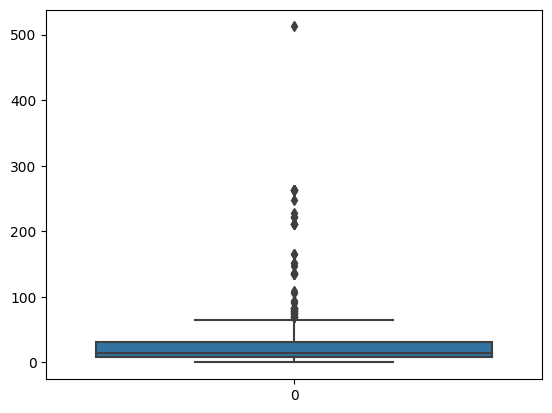

In [9]:
sns.boxplot(data['Fare'])

C:\Users\Masterkim\AppData\Local\Temp\ipykernel_6184\431312044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

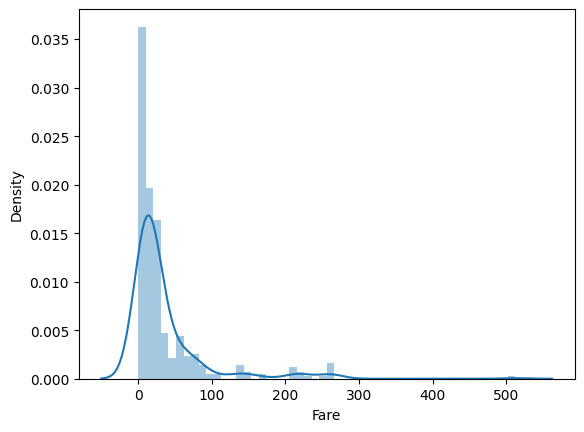

In [10]:
sns.distplot(data['Fare'])


#####  as we can see, there are many outliers and its not a uniform data so we are going to use the median to replace the null values

In [11]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())


In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


#### Changing the sex column and Embarked column to integer using label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
Label_encode = LabelEncoder()
sex = Label_encode.fit_transform(data.Sex)
embarked = Label_encode.fit_transform(data.Embarked)
data['Sex'] = sex
data['Embarked'] = embarked
data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int32  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [15]:
#### splitting the data into target and features

In [16]:
x = data.drop(columns = 'Survived')
y = data['Survived']

##### cross validation to determine the best model since the dataset is just a few entry les than 500

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [18]:
models = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(),SVC(kernel='linear'),SVC(kernel='poly'),SVC(kernel='rbf'),SVC(kernel='sigmoid'), KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

#definiing a class
def model_comparison():
    for model in models:
        cv_score = cross_val_score(model, x, y, cv = 5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        print('The accuracy of ', model, 'is : ', round(mean_accuracy*100, 2), '%')
        print('--------------------------------------------------------------')

In [19]:
model_comparison()


The accuracy of  LogisticRegression(max_iter=1000) is :  100.0 %
--------------------------------------------------------------
The accuracy of  DecisionTreeClassifier() is :  100.0 %
--------------------------------------------------------------
The accuracy of  SVC(kernel='linear') is :  100.0 %
--------------------------------------------------------------
The accuracy of  SVC(kernel='poly') is :  65.79 %
--------------------------------------------------------------
The accuracy of  SVC() is :  62.68 %
--------------------------------------------------------------
The accuracy of  SVC(kernel='sigmoid') is :  57.19 %
--------------------------------------------------------------
The accuracy of  KNeighborsClassifier() is :  66.28 %
--------------------------------------------------------------
The accuracy of  RandomForestClassifier(random_state=0) is :  100.0 %
--------------------------------------------------------------


#### As we can see that more than one model can be used due to high percentage of accuracy, i  will therefore go ahead with decision tree

In [20]:
#splitting the data into training and test data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,  random_state = 0)

In [21]:
#saving decision tree as clf
clf = DecisionTreeClassifier()
#using the training data to train the classifier

clf.fit(x_train, y_train)

# predict the test data target

y_pred_train = clf.predict(x_train)

#accuracy score calculation

training_accuracy = accuracy_score(y_train, y_pred_train)
training_accuracy = round(training_accuracy*100, 2)
print("The training accuracy using Decision tree classifier is ", training_accuracy, '%')




The training accuracy using Decision tree classifier is  100.0 %


In [22]:

# predict the test data target

y_pred_test = clf.predict(x_test)

#accuracy score calculation

test_accuracy = accuracy_score(y_test, y_pred_test)
test_accuracy = round(test_accuracy*100, 2)
print("The test accuracy using Decision tree classifier is ", test_accuracy, '%')




The test accuracy using Decision tree classifier is  100.0 %


In [23]:
et = time.time()
elp = et - st
print("elapsed time for the process: ", round(elp,2), 's')

elapsed time for the process:  11.29 s


In [26]:
#making a predictive system
import numpy as np
input_data = (3,1, 34.50000, 0, 0, 7.8292,13)
input_array=np.asarray(input_data)
#reshape
input_array_reshape = input_array.reshape(1,-1)
prediction= clf.predict(input_array_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The Individual will die')
else:
    print('The Individual will survive')

[0]
The Individual will die


C:\Users\Masterkim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
